In [1]:
# load and summarize the housing dataset
import pandas as pd
from pandas import read_csv
import matplotlib.pyplot as plt
import numpy as np


tweets = pd.read_csv(('sample_twitter.csv'))
imdb = pd.read_csv('ratings_clean.csv')
tweets.head()


,Unnamed: 0,user.id,create_at,text,Movie
0,47144,3.916531e+07,3/8/22,#TheBatman =L<�=L<�=L<�,The Batman (2022)
1,50307,7.400000e+17,3/10/22,finally a batman that listens to nirvana,The Batman (2022)
2,46600,1.490000e+18,3/6/22,@zakiscorner I saw the Batman last night and I...,The Batman (2022)
3,51872,3.993300e+04,3/6/22,I think Ive seen every incarnation of Batman ...,The Batman (2022)
4,52128,7.560000e+17,3/4/22,"After waiting 2 long years, Im FINALLY Watchi...",The Batman (2022)


In [2]:
imdb.head()

,imDbId,title,fullTitle,type,year,imDb
0,tt1877830,The Batman,The Batman (2022),Movie,2022,8.2
1,tt9032400,Eternals,Eternals (2021),Movie,2021,6.4
2,tt10872600,Spider-Man: No Way Home,Spider-Man: No Way Home (2021),Movie,2021,8.4
3,tt11286314,Don't Look Up,Don't Look Up (2021),Movie,2021,7.2
4,tt11214590,House of Gucci,House of Gucci (2021),Movie,2021,6.6


In [3]:
sent = pd.read_csv('sample_twitter_vader.csv')
merged = sent.merge(imdb, left_on = 'Movie', right_on = 'fullTitle')
merged = merged.drop(['Unnamed: 0', 'type'], axis = 1)
merged

,Unnamed: 0.1,user.id,create_at,text,Movie,sentiment_score,neg,neu,pos,compound,imDbId,title,fullTitle,year,imDb
0,47144,3.916531e+07,3/8/22,#TheBatman =L<�=L<�=L<�,The Batman (2022),0.00,0.000,1.000,0.000,0.0000,tt1877830,The Batman,The Batman (2022),2022,8.2
1,50307,7.400000e+17,3/10/22,finally a batman that listens to nirvana,The Batman (2022),0.00,0.000,1.000,0.000,0.0000,tt1877830,The Batman,The Batman (2022),2022,8.2
2,46600,1.490000e+18,3/6/22,@zakiscorner I saw the Batman last night and I...,The Batman (2022),0.72,0.134,0.499,0.367,0.7249,tt1877830,The Batman,The Batman (2022),2022,8.2
3,51872,3.993300e+04,3/6/22,I think Ive seen every incarnation of Batman ...,The Batman (2022),0.57,0.050,0.821,0.130,0.5719,tt1877830,The Batman,The Batman (2022),2022,8.2
4,52128,7.560000e+17,3/4/22,"After waiting 2 long years, Im FINALLY Watchi...",The Batman (2022),0.00,0.000,1.000,0.000,0.0000,tt1877830,The Batman,The Batman (2022),2022,8.2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3074,461595,2.947009e+09,10/25/16,Coming VERY soon - an extended trailer concept...,Doctor Strange (2016),0.00,0.000,1.000,0.000,0.0000,tt1211837,Doctor Strange,Doctor Strange (2016),2016,7.5
3075,461609,1.781488e+08,10/26/16,@TASK1ne @SuperSuitShow Marvel today has not b...,Doctor Strange (2016),-0.05,0.121,0.766,0.113,-0.0511,tt1211837,Doctor Strange,Doctor Strange (2016),2016,7.5
3076,423377,3.853644e+09,8/7/17,i thought of adding the Will Smith Version but...,Suicide Squad (2016),0.57,0.000,0.837,0.163,0.5719,tt1386697,Suicide Squad,Suicide Squad (2016),2016,5.9
3077,423950,4.507376e+08,8/7/17,Will smith lol https://t.co/9fwL1Ys1eF,Suicide Squad (2016),0.42,0.000,0.517,0.483,0.4215,tt1386697,Suicide Squad,Suicide Squad (2016),2016,5.9


In [4]:
sent_merge = sent.merge(pd.read_csv('sample_twitter_doc_reduction.csv'))

In [5]:
merged = sent_merge.merge(imdb, left_on = 'Movie', right_on = 'fullTitle')
merged = merged.drop(['Unnamed: 0', 'type', 'user.id'], axis = 1)
merged = merged.groupby(['imDbId', 'fullTitle']).mean()
merged

,,Unnamed: 0.1,sentiment_score,neg,neu,pos,compound,0,1,2,3,...,92,93,94,95,96,97,98,99,year,imDb
imDbId,fullTitle,,,,,,,,,,,,,,,,,,,,,
tt0451279,Wonder Woman (2017),388385.364341,0.153876,0.049217,0.826682,0.124124,0.153709,0.215706,1.071891,0.210611,-0.244186,...,-0.159661,0.219046,1.132215,-0.038823,-0.218128,-0.803020,-0.039434,0.409430,2017.0,7.4
tt0870154,Jungle Cruise (2021),42666.000000,0.032500,0.126500,0.832250,0.041250,0.030300,0.008608,0.060054,0.017765,-0.014348,...,-0.008670,0.015807,0.054724,-0.002682,-0.017528,-0.041845,-0.002370,0.026704,2021.0,6.6
tt0974015,Justice League (2017),331784.702128,0.308652,0.076369,0.669142,0.254475,0.308096,0.072019,0.620922,0.114003,-0.127672,...,-0.116693,0.125223,0.674138,-0.001630,-0.081520,-0.483939,0.000128,0.228494,2017.0,6.1
tt11196036,The Card Counter (2021),35546.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.010812,0.027551,0.007754,-0.009651,...,-0.001799,0.005474,0.028727,-0.003892,-0.000897,-0.017263,0.002184,0.013711,2021.0,6.3
tt11214590,House of Gucci (2021),4726.250000,0.111250,0.039750,0.869625,0.090750,0.110550,0.020406,0.120145,0.033792,-0.022957,...,-0.013329,0.026664,0.124759,-0.005280,-0.020152,-0.095975,-0.004241,0.042919,2021.0,6.6
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
tt8079248,Yesterday (2019),136818.180124,0.267950,0.049292,0.810863,0.139851,0.267977,0.158101,1.018972,0.207911,-0.240719,...,-0.187007,0.217310,1.095268,-0.024338,-0.161388,-0.783513,0.006490,0.380584,2019.0,6.8
tt9032400,Eternals (2021),33109.351351,0.141892,0.058054,0.832486,0.109432,0.141857,0.067277,0.292880,0.055992,-0.054630,...,-0.039182,0.046954,0.284997,-0.017369,-0.072222,-0.203704,-0.025157,0.119946,2021.0,6.4
tt9252508,Tall Girl (2019),253423.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.014029,0.062636,0.009789,-0.016678,...,-0.011177,0.012565,0.059604,-0.007999,-0.013461,-0.043909,-0.009059,0.015216,2019.0,5.2


c:\Users\markl\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


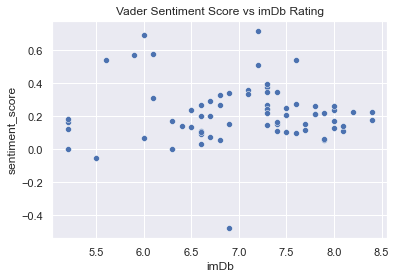

In [6]:
import seaborn as sns
import matplotlib.pyplot as plt
sns.set(rc={'figure.facecolor':'white'})
sns.scatterplot(merged.imDb, merged.sentiment_score)
plt.title('Vader Sentiment Score vs imDb Rating')
plt.show()

In [7]:
from sklearn import datasets
from sklearn.linear_model import Lasso
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import train_test_split
from sklearn import metrics


y = merged.imDb
X = merged.drop(columns = ['imDb'])
#print(X.head())
#
# Create training and test split
#
#X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)
#print(X_train)
cv = KFold(n_splits=5, random_state=1, shuffle=True)

# Create an instance of Lasso Regression implementation

lasso = Lasso(alpha=0.1)
# Fit the Lasso model
lasso.fit(X, y)
#y_pred = lasso.predict(y)
#
# Create the model score
print(lasso.coef_)
print(lasso.intercept_)

scores = cross_val_score(lasso, X, y, scoring='neg_mean_absolute_error',
                         cv=cv, n_jobs=-1)

print("MAE: ",np.mean(np.absolute(scores)))
print("R Squared: ", lasso.score(X,y))

[ 2.19302153e-07 -0.00000000e+00  0.00000000e+00 -0.00000000e+00
  0.00000000e+00 -0.00000000e+00  0.00000000e+00  0.00000000e+00
  0.00000000e+00 -0.00000000e+00  0.00000000e+00 -0.00000000e+00
  0.00000000e+00  8.94655611e-02 -0.00000000e+00 -0.00000000e+00
 -0.00000000e+00 -0.00000000e+00 -0.00000000e+00  0.00000000e+00
 -0.00000000e+00 -0.00000000e+00  0.00000000e+00 -0.00000000e+00
 -0.00000000e+00 -0.00000000e+00  0.00000000e+00  0.00000000e+00
  0.00000000e+00 -0.00000000e+00 -0.00000000e+00  0.00000000e+00
 -0.00000000e+00  0.00000000e+00 -0.00000000e+00  0.00000000e+00
  0.00000000e+00 -0.00000000e+00  0.00000000e+00 -0.00000000e+00
 -0.00000000e+00  0.00000000e+00  0.00000000e+00 -0.00000000e+00
 -0.00000000e+00 -0.00000000e+00 -0.00000000e+00 -0.00000000e+00
 -0.00000000e+00 -0.00000000e+00 -0.00000000e+00 -0.00000000e+00
  0.00000000e+00 -0.00000000e+00  0.00000000e+00  0.00000000e+00
  0.00000000e+00 -0.00000000e+00  0.00000000e+00 -0.00000000e+00
 -0.00000000e+00  0.00000

In [8]:
from sklearn.linear_model import LinearRegression
reg = LinearRegression().fit(X, y)

print(reg.coef_)
print(reg.intercept_)
#y_pred = reg.predict(X_test)
scores = cross_val_score(reg, X, y, scoring='neg_mean_absolute_error',
                         cv=cv, n_jobs=-1)
print("MAE: ",np.mean(np.absolute(scores)))
print("R Squared: ", reg.score(X,y))

[-7.02279913e-06  1.42080168e+01 -6.21034494e+00 -1.35902161e+00
  1.51908886e-01 -1.57114811e+01 -5.50943833e+00 -3.61193236e+01
  1.21205785e+01 -3.84352211e+01 -4.11682100e+01 -3.05600412e+01
  1.01698280e+01 -6.33430767e+01  4.21170645e+01 -2.46740074e+01
  1.90187326e+00 -3.88946615e+01  2.50031341e+01 -1.17035433e+01
 -1.49107356e+01  4.05543523e+01  3.68551999e+01  5.48295970e+01
  5.06937962e+01  1.82214536e+01 -1.06375229e+01 -1.84883666e+01
 -4.43703238e+00 -8.98076264e+00 -3.37955959e+01  1.64536700e+01
 -3.31807145e+01  7.22363747e+00 -7.81259661e+00 -1.08210228e+00
 -9.57915783e+00  5.50868692e+00 -4.14389284e+01  1.86838150e+01
 -1.04052182e+01 -3.39205359e+01 -1.66198111e+00  5.30877041e+00
 -6.68187442e+00 -2.58695543e+01  6.35135904e+01 -1.92040953e+01
 -2.00748840e+01 -3.71398923e+01 -1.12304704e+01 -4.30273017e+01
  5.05354865e+01 -3.14801156e+01 -6.05451719e+00 -2.44795470e+01
  4.33527514e+01 -9.41103051e+00 -4.78817666e+00 -5.48141568e+00
 -3.08364349e+01  1.54537